In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import os
import pickle

In [11]:
model_path = os.getcwd()+"/"

In [4]:
# model options:
models = ["VGG","VGG19"]
version = ["v1","v2","v3","v4","v5","v6","v7","v8","v9","v2b","v8b"]

## A loop for plotting each model's metrics

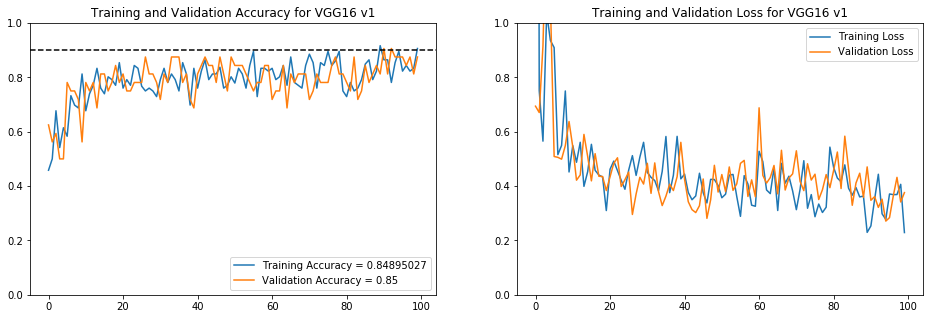

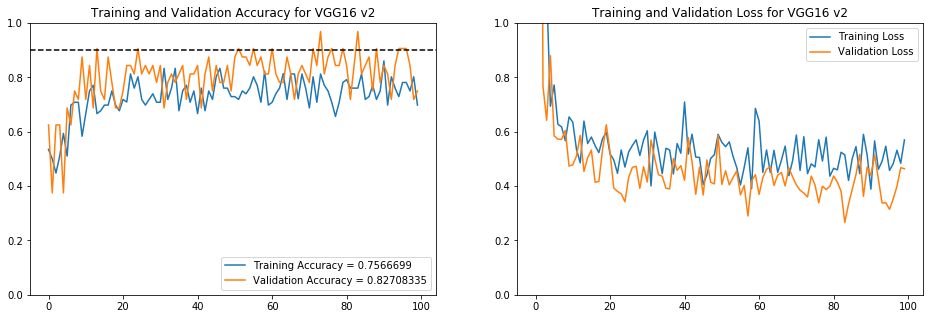

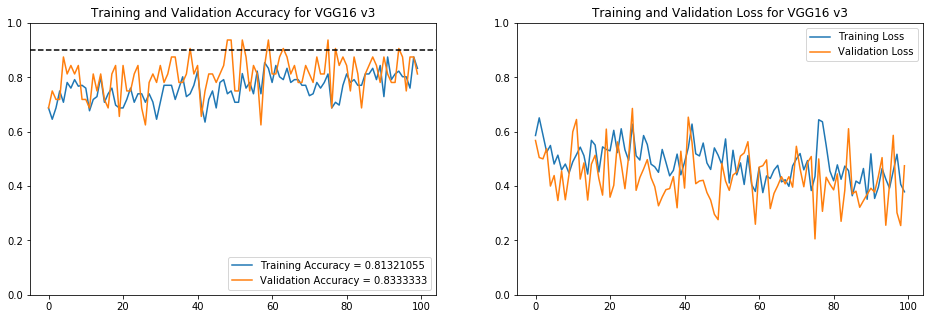

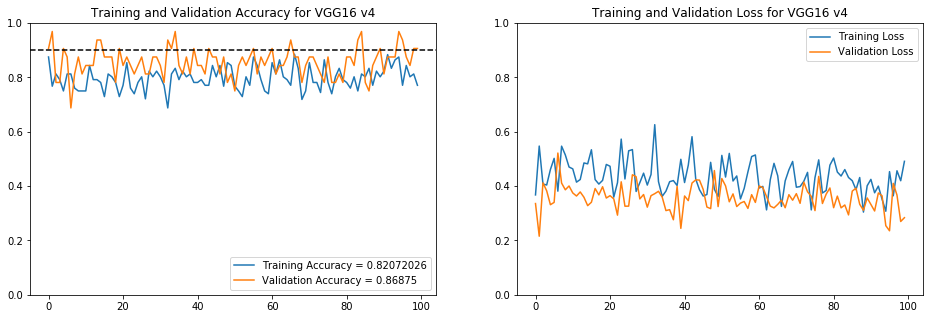

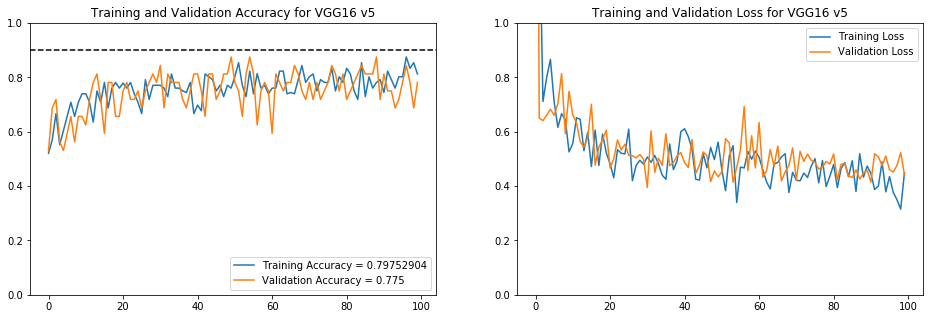

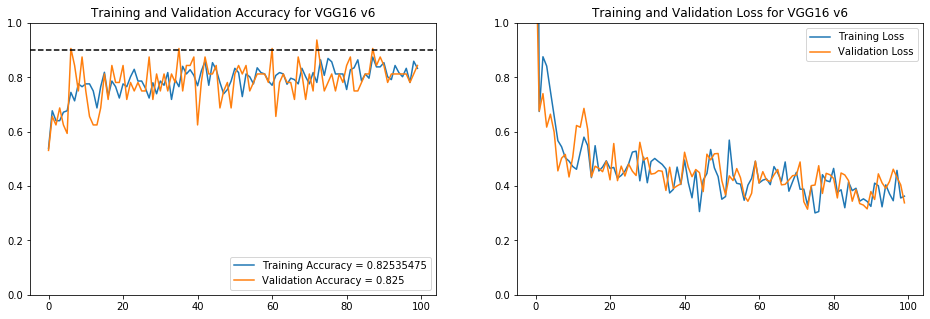

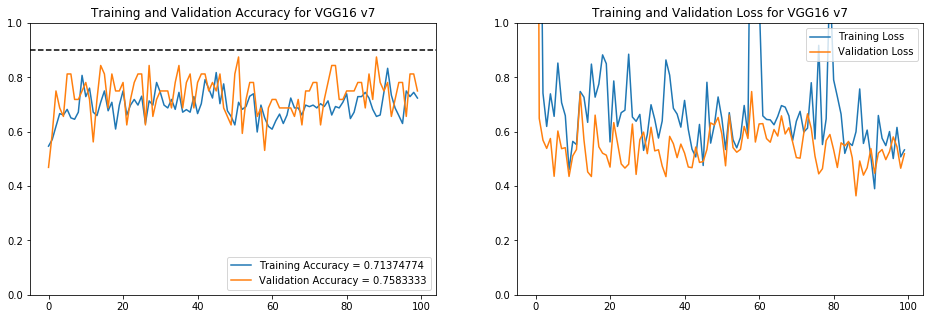

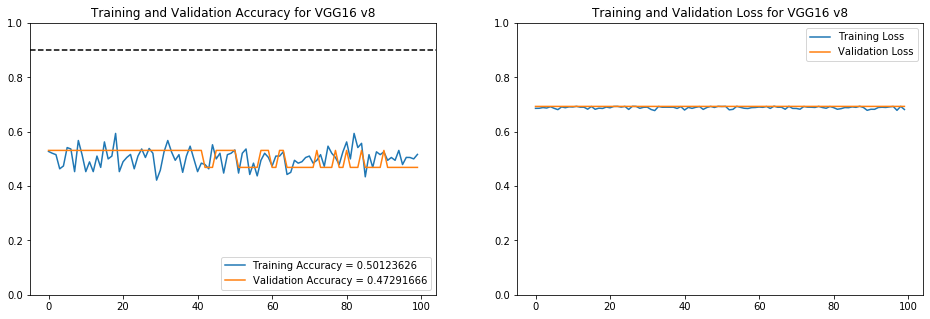

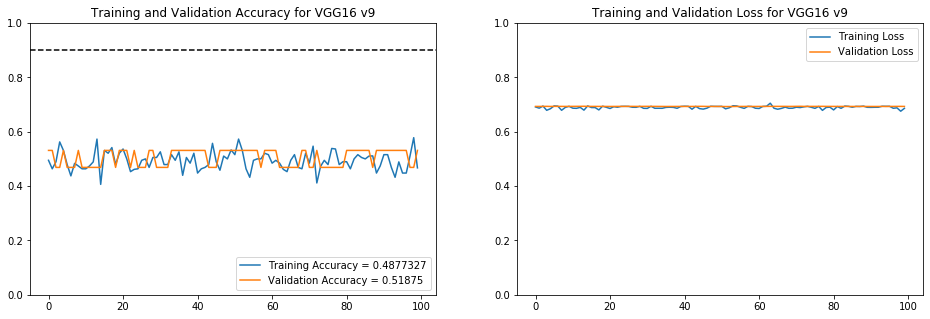

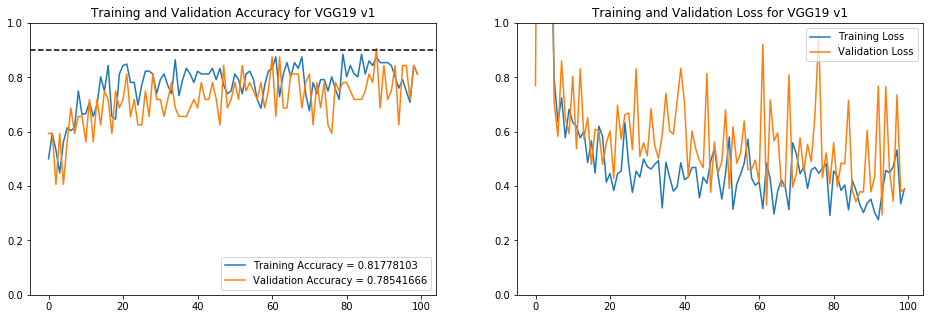

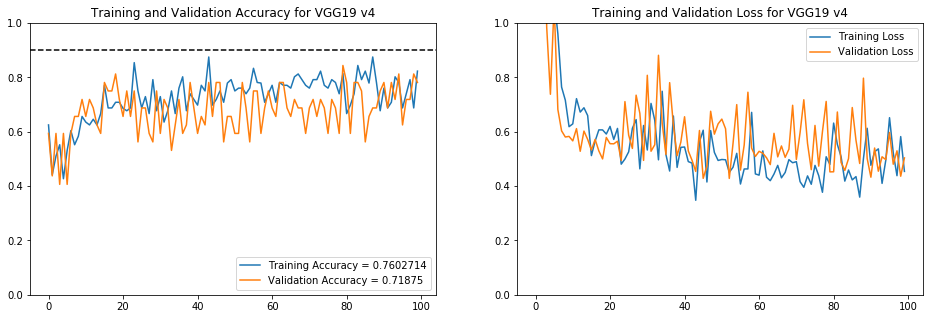

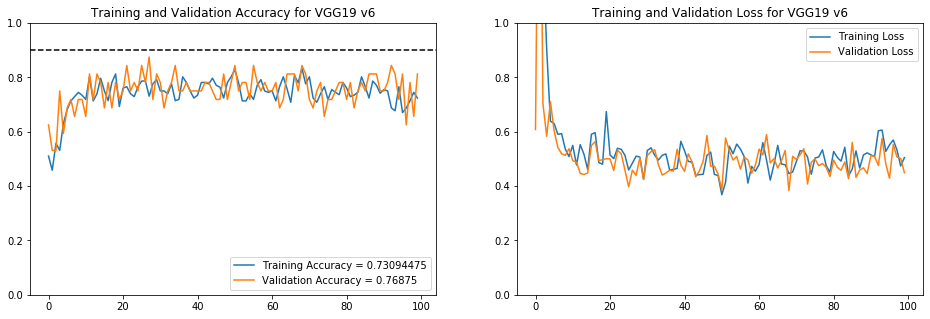

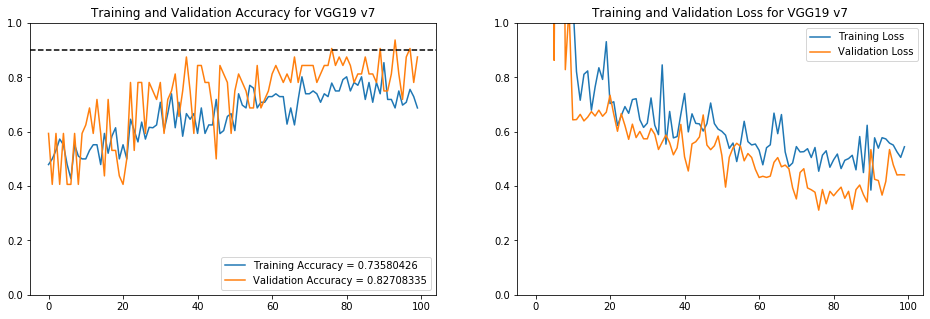

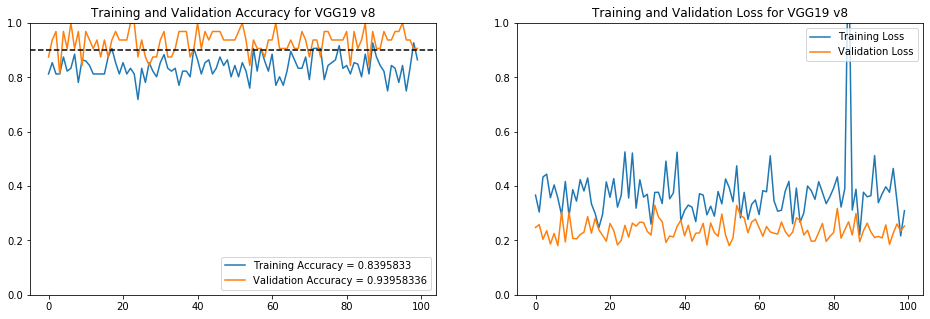

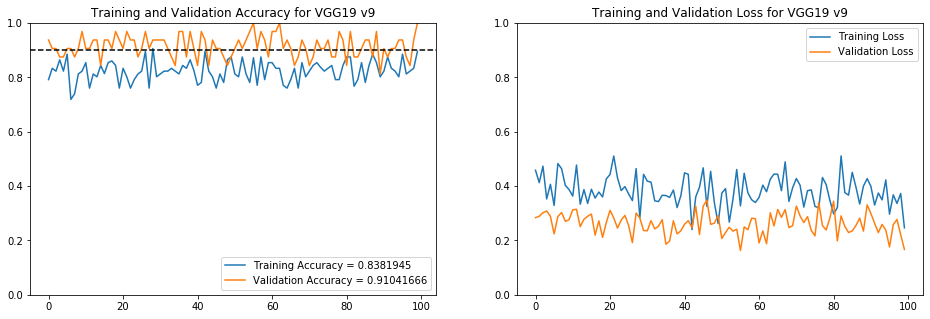

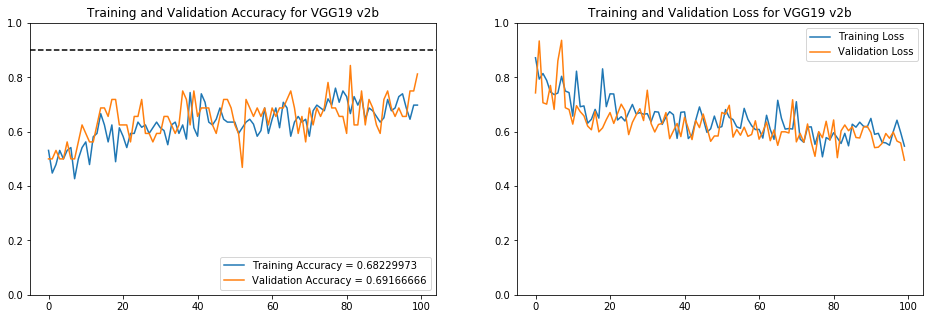

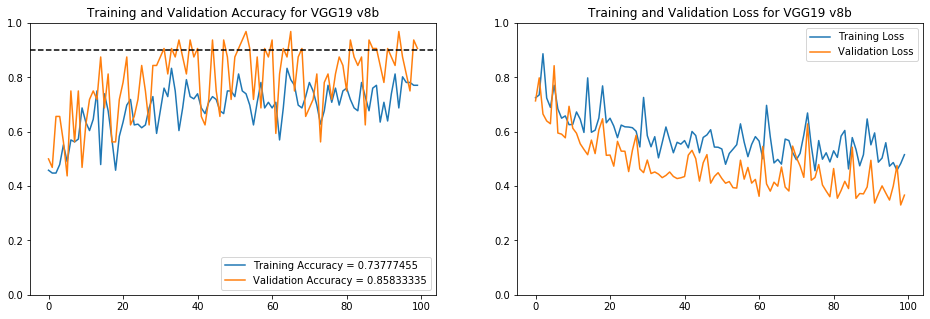

In [39]:
for m in models:
    for v in version:
        
        
        # Load in model history:
        filename = model_path+m+"_binaryclassifier_"+v+".pkl"
        if os.path.exists(filename):
            pickle_off = open(filename,"rb")
            fit_history = pickle.load(pickle_off)
        else:
            continue
        #print(fit_history.keys())
        
        # Figure out plot title
        if m=="VGG":
            modelname = "VGG16"
        else:
            modelname = "VGG19"
            
        title = modelname+" "+v

        acc = fit_history['acc']
        val_acc = fit_history['val_acc']

        loss = fit_history['loss']
        val_loss = fit_history['val_loss']
        
        acc_last = np.mean(acc[-15:])
        val_acc_last = np.mean(val_acc[-15:])

        epochs_range = range(len(acc))

        plt.figure(figsize=(16, 5))
        ax1 = plt.subplot(1, 2, 1)
        line1 = plt.plot(epochs_range, acc, label='Training Accuracy = '+str(acc_last))
        line2 = plt.plot(epochs_range, val_acc, label='Validation Accuracy = '+str(val_acc_last))
        plt.ylim(0,1.0)
        ax1.axhline(0.9, color='black', linestyle='--')
        plt.legend(loc='lower right')
        plt.title('Training and Validation Accuracy for '+title)

        ax2 = plt.subplot(1, 2, 2)
        plt.plot(epochs_range, loss, label='Training Loss')
        plt.plot(epochs_range, val_loss, label='Validation Loss')
        plt.ylim(0,1.0)
        plt.legend(loc='upper right')
        plt.title('Training and Validation Loss for '+title)
        plt.savefig('./tuning_plots/'+m+'.binary.'+v+'.png')
        plt.show()